In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
def plot_image(x, y, i):
    plt.figure(figsize=(2, 3))
    plt.imshow(x[i])
    plt.xlabel(classes[y[i][0]])

In [7]:
y_train[0][0]

6

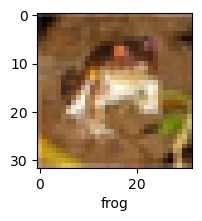

In [8]:
plot_image(x_train, y_train, 0)

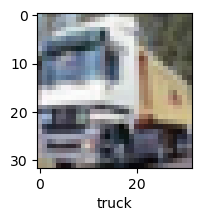

In [9]:
plot_image(x_train, y_train, 1)

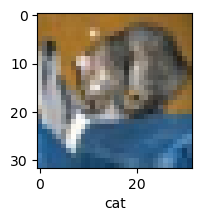

In [10]:
plot_image(x_test, y_test, 0)

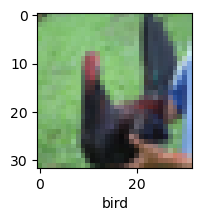

In [11]:
plot_image(x_test, y_test, 25)

In [12]:
32 * 32 * 3

3072

In [13]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

ann.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [14]:
ann.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 32.3498 - accuracy: 0.1667
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3123 - accuracy: 0.1002
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3060 - accuracy: 0.0995
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0982
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0978
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3031 - accuracy: 0.0996
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3028 - accuracy: 0.0997
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.0990
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3027 - accuracy: 0.0992
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 2.3

In [15]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3029 - accuracy: 0.0998


[2.302935838699341, 0.0997999981045723]

In [16]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [17]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [18]:
cnn.fit(x_train, y_train, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 12s 4ms/step - loss: 1.9128 - accuracy: 0.3801
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2907 - accuracy: 0.5440
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1446 - accuracy: 0.6025
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0377 - accuracy: 0.6395
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9660 - accuracy: 0.6655
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8891 - accuracy: 0.6912
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8311 - accuracy: 0.7107
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7746 - accuracy: 0.7301
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7200 - accuracy: 0.7498
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.66

In [20]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.8585 - accuracy: 0.6175


[1.858490228652954, 0.6175000071525574]

In [23]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.5850612e-03, 1.2778979e-07, 3.1275395e-03, 2.2409061e-01,
        5.6535020e-05, 7.6954097e-01, 4.5492346e-04, 1.1357582e-03,
        5.2411278e-06, 3.3270437e-06],
       [2.3315788e-08, 2.6944542e-07, 1.7906384e-16, 8.5878266e-13,
        7.4060731e-22, 2.6037402e-19, 1.7855598e-20, 1.9228273e-23,
        9.9999976e-01, 2.1687444e-12],
       [1.4656362e-01, 3.6850479e-01, 4.5393528e-03, 2.3066818e-03,
        3.2898814e-03, 3.0093181e-05, 1.8639434e-05, 7.4312615e-05,
        1.6474520e-01, 3.0992740e-01],
       [1.5514891e-01, 3.0127698e-05, 2.2343324e-08, 2.2163256e-06,
        9.2542699e-08, 1.5727563e-09, 6.1606407e-08, 2.1778218e-11,
        8.4481853e-01, 6.4533014e-09],
       [1.0895085e-06, 1.6332040e-05, 9.6543348e-01, 2.1999562e-02,
        8.8470643e-03, 3.2484852e-05, 3.6681567e-03, 1.0808761e-06,
        5.9901367e-08, 7.8398722e-07]], dtype=float32)

In [24]:
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:5]

[5, 8, 1, 8, 2]

Text(0.5, 0, 'dog')

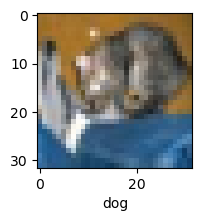

In [28]:
plt.figure(figsize=(2, 3))
plt.imshow(x_test[0])
plt.xlabel(classes[y_pred[0]])

In [31]:
classes[y_test[0][0]]

'cat'

In [32]:
for i in range(5):
    print(classes[y_test[i][0]], classes[y_pred[i]])

cat dog
ship ship
ship automobile
airplane ship
frog bird


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1000
           1       0.82      0.73      0.77      1000
           2       0.48      0.56      0.51      1000
           3       0.38      0.52      0.44      1000
           4       0.55      0.55      0.55      1000
           5       0.50      0.57      0.53      1000
           6       0.76      0.64      0.70      1000
           7       0.74      0.57      0.64      1000
           8       0.77      0.70      0.73      1000
           9       0.77      0.69      0.73      1000

    accuracy                           0.62     10000
   macro avg       0.64      0.62      0.63     10000
weighted avg       0.64      0.62      0.63     10000

